## Final Project Submission

Please fill out:
* Student name:  Olgah Omollo
* Student pace:  part time 
* Scheduled project review date/time: 29/04/2025
* Instructor name: Maryanne Mwikali
* Blog post URL:


# Project Overview

## Project Name: Aircraft Risk Evaluation

# Introduction

The goal of this project is to identify aircraft models with the lowest risk based on aviation accident data. 
By analyzing incidents, injuries, and fatalities, we aim to rank aircraft models by safety.
This insight is valuable for decision making in the new business endevour of operating airlines

## Data Overview



Dataset: Aviation_Data.csv

Rows: 90,348
Columns: 31

Source: National Transportation Safety Board (NTSB) accident records.

## Data Loading

Importing python libraries required for data analysis and visualization

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Dowloading of the CSV file

In [226]:
df=pd.read_csv("AviationData.csv", encoding="ISO-8859-1",low_memory=False)

# Reading the first 5 rows of data 

In [227]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Viewing information on the data to identify the colums with missing information

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Creating of relevant colums for data analysis

In [229]:
relevant_columns = [
    "Investigation.Type","Event.Date","Make", "Model","Number.of.Engines", "Injury.Severity",
    "Total.Fatal.Injuries", "Total.Serious.Injuries",
    "Total.Minor.Injuries", "Total.Uninjured",'Purpose.of.flight', 'Weather.Condition',
]
df_clean =df[relevant_columns].copy()

In [230]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Make                    88826 non-null  object 
 3   Model                   88797 non-null  object 
 4   Number.of.Engines       82805 non-null  float64
 5   Injury.Severity         87889 non-null  object 
 6   Total.Fatal.Injuries    77488 non-null  float64
 7   Total.Serious.Injuries  76379 non-null  float64
 8   Total.Minor.Injuries    76956 non-null  float64
 9   Total.Uninjured         82977 non-null  float64
 10  Purpose.of.flight       82697 non-null  object 
 11  Weather.Condition       84397 non-null  object 
dtypes: float64(5), object(7)
memory usage: 8.1+ MB


### Data Cleaning

In [231]:
#Clean column names (remove extra spaces)
df_clean.columns = df_clean.columns.str.strip()

In [232]:
# Standardize 'Make' and 'Model' (lowercase everything)
df_clean['Make'] = df_clean['Make'].str.upper()
df_clean['Model'] = df_clean['Model'].str.upper()

Convert injury columns to numeric and fill missing with 0

In [233]:

injury_cols = [
    "Total.Fatal.Injuries", "Total.Serious.Injuries",
    "Total.Minor.Injuries", "Total.Uninjured"
]
df_clean[injury_cols] =df_clean[injury_cols].apply(pd.to_numeric, errors='coerce').fillna(0)



Cleaning the Injury colums by filling blank rows with Unavailble

In [234]:
df_clean['Injury.Severity'] = df_clean['Injury.Severity'].fillna('Unavailable')


Cleaning Weather Condition column by filling blank rows with UNK

In [235]:
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].fillna('UNK')

Cleaning weather Condition column by filling empty rows with 'unknown'

In [236]:
df_clean['Purpose.of.flight'] = df_clean['Purpose.of.flight'].fillna('Unknown')

Cleaning the number of Engine columns by removing the empty rows

In [237]:
df_clean = df_clean.dropna(subset=['Number.of.Engines'])

Cleaning the make column by removing empty rows

In [238]:
df_clean = df_clean.dropna(subset=['Make'])

Cleaning the Model colum by removing the emty rows

In [239]:
df_clean = df_clean.dropna(subset=['Model'])

Connvert event date to year for easier analysis

In [240]:
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'])

# Extract year
df_clean['Event.year'] = df_clean['Event.Date'].dt.year


Confirming the data after Cleaning

In [241]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82754 entries, 0 to 88886
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      82754 non-null  object        
 1   Event.Date              82754 non-null  datetime64[ns]
 2   Make                    82754 non-null  object        
 3   Model                   82754 non-null  object        
 4   Number.of.Engines       82754 non-null  float64       
 5   Injury.Severity         82754 non-null  object        
 6   Total.Fatal.Injuries    82754 non-null  float64       
 7   Total.Serious.Injuries  82754 non-null  float64       
 8   Total.Minor.Injuries    82754 non-null  float64       
 9   Total.Uninjured         82754 non-null  float64       
 10  Purpose.of.flight       82754 non-null  object        
 11  Weather.Condition       82754 non-null  object        
 12  Event.year              82754 non-null  int64 

# Data Analysis

### Create a risk score

In [242]:

# Calculate risk score (Fatal=10, Serious=5, Minor=2)
df_clean["RiskScore"] = (
    10 * df_clean["Total.Fatal.Injuries"] +
    5 * df_clean["Total.Serious.Injuries"] +
    2 * df_clean["Total.Minor.Injuries"]
)



Creating a new column called RiskScore in the Cleaned DataFrame and will be calculated based on injuries associated with each aircraft model or type. Formula to be used' Risk score = ((10×Fatal Injuries)+(5×Serious Injuries)+(2×Minor Injuries))
10 used to represent higher risk

5 represent Medium risk

2 represent low risk

In [243]:
df_clean.info()# Confirming the additional Riskscore column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82754 entries, 0 to 88886
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      82754 non-null  object        
 1   Event.Date              82754 non-null  datetime64[ns]
 2   Make                    82754 non-null  object        
 3   Model                   82754 non-null  object        
 4   Number.of.Engines       82754 non-null  float64       
 5   Injury.Severity         82754 non-null  object        
 6   Total.Fatal.Injuries    82754 non-null  float64       
 7   Total.Serious.Injuries  82754 non-null  float64       
 8   Total.Minor.Injuries    82754 non-null  float64       
 9   Total.Uninjured         82754 non-null  float64       
 10  Purpose.of.flight       82754 non-null  object        
 11  Weather.Condition       82754 non-null  object        
 12  Event.year              82754 non-null  int64 

Downloading of the cleaned data

In [244]:
df_clean.to_csv('cleaned_data.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'cleaned_data.csv'

### Analysis of investigations done per plane make and model

In [ ]:
df_clean.groupby(["Make", "Model", "Investigation.Type"]).size().reset_index(name="Count").sort_values(by="Count", ascending=True)

,Make,Model,Investigation.Type,Count
0,107.5 FLYING CORPORATION,ONE DESIGN DR 107,Accident,1
10964,MATTISON,MAC MU-200,Accident,1
10965,MATTISON,MAC ULTRALIGHT,Accident,1
10966,MATTISON,STARDUSTER TOO,Accident,1
10967,MATTO,KR-2A MODIFIED,Accident,1
...,...,...,...,...
4403,CESSNA,150,Accident,798
13066,PIPER,PA-28-140,Accident,916
4518,CESSNA,172N,Accident,1142
4462,CESSNA,172,Accident,1662


### Cessna -152 had the highest number of accidents  tottaling to 2352,while 107.5 FLYING CORPORATION	ONE DESIGN DR 107	had 1 accident

### Count of Risk scores per number of Engines

In [ ]:

df_clean.groupby(['Number.of.Engines'])['RiskScore'].count().reset_index()

,Number.of.Engines,RiskScore
0,0.0,1226
1,1.0,69569
2,2.0,11078
3,3.0,483
4,4.0,431
5,6.0,1
6,8.0,3


In [ ]:
###Risk summary grouped by make and model of aircraft based on Investigation type and risk score
risk_summary = (
    df_clean
    .groupby(["Make", "Model"])
    .agg(
        Total_Incidents=("RiskScore", "count"),
        Total_Accidents=("RiskScore", "sum"), 
        Total_RiskScore=("RiskScore", "sum"),
        Avg_RiskScore=("RiskScore", "mean")
    )
    .reset_index()
    .sort_values(by="Avg_RiskScore")
)

In [ ]:
risk_summary.head(10)

,Make,Model,Total_Incidents,Total_Accidents,Total_RiskScore,Avg_RiskScore
16938,ZWICKER MURRAY R,GLASTAR,1,0.0,0.0,0.0
7199,FLURRY,AVENTURA II,1,0.0,0.0,0.0
7197,FLUGZEUGBAU,EA-300L,1,0.0,0.0,0.0
7195,FLOYD R.HARRIS,EAGLE 2,1,0.0,0.0,0.0
7194,FLOYD JOSEPH B,RV6,1,0.0,0.0,0.0
14983,SONEX,WAIEX,1,0.0,0.0,0.0
7191,FLOURNOY MARTIN R,FLOURNOY MR S1S,1,0.0,0.0,0.0
7189,FLOHR DAVID J,R 80 TIGER MOTH,1,0.0,0.0,0.0
7186,FLIGHTWORKS CORP,CAPELLA XS FW2C80TD,1,0.0,0.0,0.0
7181,FLIGHTSTAR,FLIGHTSTAR II-SL,1,0.0,0.0,0.0


In [ ]:
#List of top 10 models with Zero risk
top_10_makes_models = risk_summary[['Make', 'Model']].head(10).values.tolist()

# Display the result
print(top_10_makes_models)

[['ZWICKER MURRAY R', 'GLASTAR'], ['FLURRY', 'AVENTURA II'], ['FLUGZEUGBAU', 'EA-300L'], ['FLOYD R.HARRIS', 'EAGLE 2'], ['FLOYD JOSEPH B', 'RV6'], ['SONEX', 'WAIEX'], ['FLOURNOY MARTIN R', 'FLOURNOY MR S1S'], ['FLOHR DAVID J', 'R 80 TIGER MOTH'], ['FLIGHTWORKS CORP', 'CAPELLA XS FW2C80TD'], ['FLIGHTSTAR', 'FLIGHTSTAR II-SL']]


Top 5 Models with Single reported incidents and Zero accidents are : Glastar, Aventura II , EA-300L. Eagle 2 and RV6

Analysis of the riskiest Aircraft Model

In [ ]:
Highest_risk_models = (
    risk_summary[risk_summary["Total_Accidents"] >= 1]  # Filter for rows with at least 1 accident
    .sort_values(by="Avg_RiskScore")  # Sort by Avg_RiskScore (ascending order by default)
    .tail(10)  # Select top 10 rows
)


# Find the 10 models with the lowest average risk
#lowest_risk_models = risk_summary.sort_values('Avg_RiskScore').head(10)

print("Riskiest Aircraft Models:\n")
print(Highest_risk_models)


Riskiest Aircraft Models:

                    Make        Model  Total_Incidents  Total_Accidents  \
3145              BOEING    777-200ER                1            815.0   
6257             DOUGLAS        MD-83                1            880.0   
15927            TUPOLEV        TU154                1            890.0   
2856              BOEING      727-134                1            920.0   
841     AIRBUS INDUSTRIE  A300B4-605R                2           2713.0   
2834              BOEING          707                1           1440.0   
745               AIRBUS         A310                1           1522.0   
6529             EMBRAER  E135 LEGACY                1           1540.0   
10682  MCDONNELL DOUGLAS      DC-8-62                1           1740.0   
3133              BOEING   767-366-ER                1           2170.0   

       Total_RiskScore  Avg_RiskScore  
3145             815.0          815.0  
6257             880.0          880.0  
15927            890.0     

The riskiest plane is Boeing 767-366-ER with a total of 2170 accidents 

 Analysis of the lowest risk Aircraft Models

In [ ]:

# Filter aircraft with 1+ Accidents
lowest_risk_models = (
    risk_summary[(risk_summary["Total_Accidents"] == 0) & (risk_summary["Total_Incidents"] == 1)]  # Filter for no accidents and no incidents
    .sort_values(by="Avg_RiskScore")  # Sort by Avg_RiskScore in ascending order
    .head(10)  # Select top 10 rows
)


# Find the 10 models with the lowest average risk
#lowest_risk_models = risk_summary.sort_values('Avg_RiskScore').head(10)

print("Safest Aircraft Models:\n")
print(lowest_risk_models)


Safest Aircraft Models:

                   Make             Model  Total_Incidents  Total_Accidents  \
16938  ZWICKER MURRAY R           GLASTAR                1              0.0   
10302           MANDLEY     STEEN SKYBOLT                1              0.0   
10304         MANKOVICH          PARAKEET                1              0.0   
10307         MANOUCHER  LANCAIR 360 MKII                1              0.0   
10310   MANTELL ALLAN T     KITFOX 4 1200                1              0.0   
10256    LYOYD THOMPSON       POBER PIXIE                1              0.0   
10255    LYONS STUECKLE       QUICKIE Q-2                1              0.0   
10252        LYNN PERRY           CAVALON                1              0.0   
10187  LOVE, SANFORD W.         DOMINATOR                1              0.0   
10301           MANCINI         VANS RV-4                1              0.0   

       Total_RiskScore  Avg_RiskScore  
16938              0.0            0.0  
10302              0.0   

## Data Visualization

Comparison of number of Engines and risk score

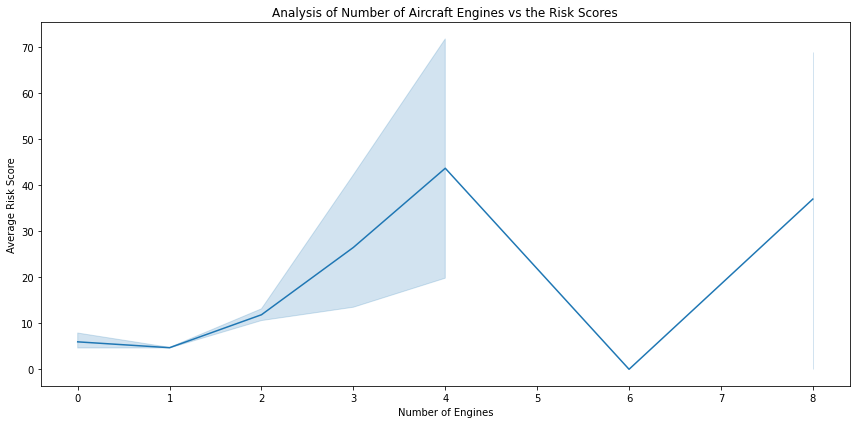

In [ ]:

plt.figure(figsize=(12, 6))
sns.lineplot(
    x="Number.of.Engines",  # x-axis: Number of Engines
    y="RiskScore",      # y-axis: Average Risk Score
    data=df_clean           # Data from the df_clean DataFrame
)
plt.title("Analysis of Number of Aircraft Engines vs the Risk Scores")
plt.xlabel("Number of Engines")
plt.ylabel("Average Risk Score")
plt.tight_layout()
plt.show()

 Airplanes with 6 engines have the lowest risk score  while those with 4 engines have the highest risk score

## Line graph of Investigations Types over the years


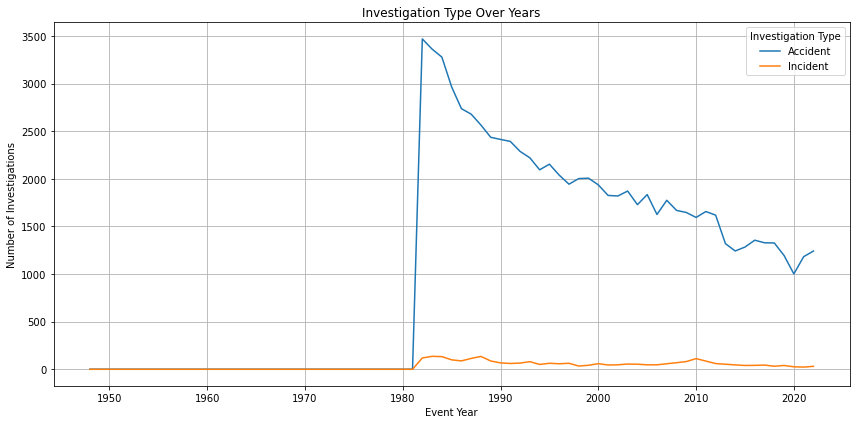

In [ ]:
grouped = df_clean.groupby(['Event.year', 'Investigation.Type']).size().reset_index(name='Count')

# Pivot for plotting
pivot_df = grouped.pivot(index='Event.year', columns='Investigation.Type', values='Count').fillna(0)

# Plot
pivot_df.plot(kind='line', figsize=(12, 6))

plt.title('Investigation Type Over Years')
plt.xlabel('Event Year')
plt.ylabel('Number of Investigations')
plt.legend(title='Investigation Type')
plt.grid(True)
plt.tight_layout()
plt.show()

Sublots of the diffrent injury levels per year

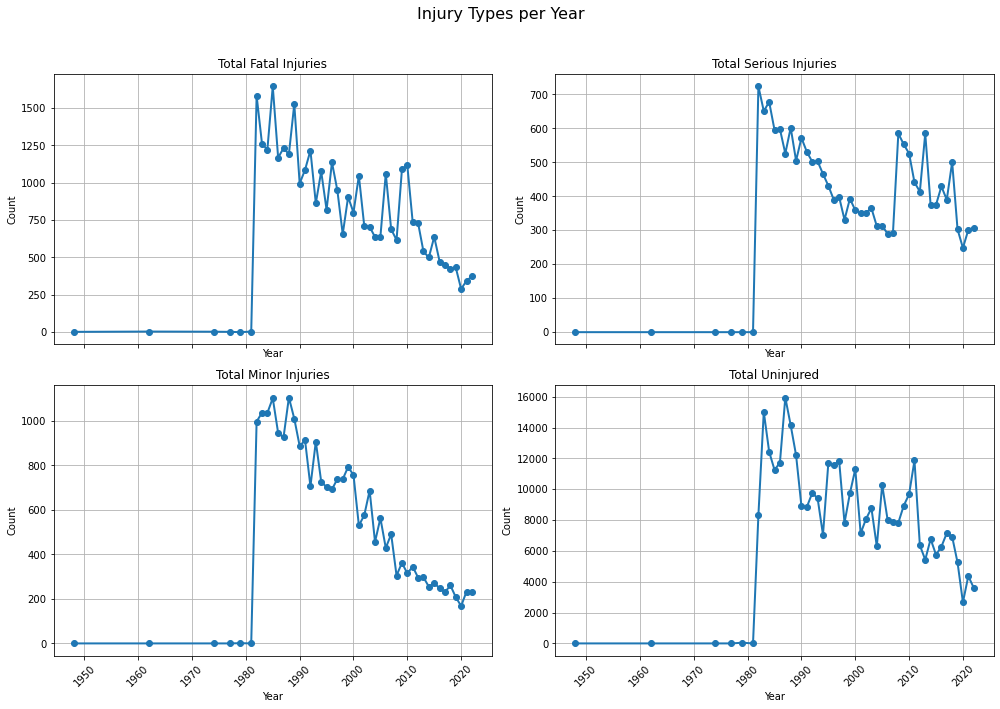

In [ ]:
injury_cols = ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']

# Group by year and sum each injury type
injuries_by_year = df_clean.groupby('Event.year')[injury_cols].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

# Plot each injury type
for i, col in enumerate(injury_cols):
    axes[i].plot(injuries_by_year['Event.year'], injuries_by_year[col], marker='o', linewidth=2)
    axes[i].set_title(col.replace('.', ' '), fontsize=12)
    axes[i].set_ylabel('Count')
    axes[i].grid(True)

# Shared x-axis label
for ax in axes:
    ax.set_xlabel('Year')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Injury Types per Year', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

There were no injuries from 1950 to 1980
The number of injuries have been gradually reducing from  1982


### Heatmap: Correlation between the Injury types

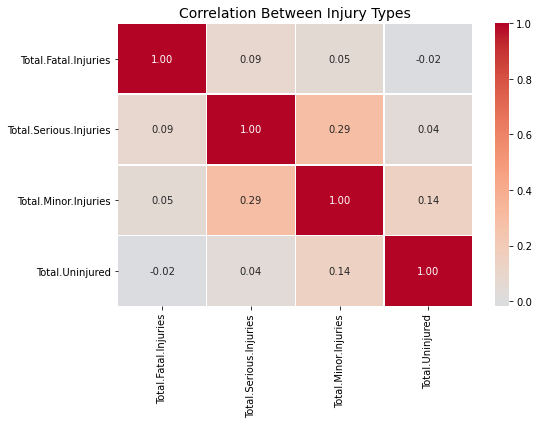

In [ ]:
injury_cols = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]

# Compute correlation matrix
correlation_matrix = df_clean[injury_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)

plt.title('Correlation Between Injury Types', fontsize=14)
plt.tight_layout()
plt.show()


Understanding the heatmap correlation

High positive correlation between Fatal and Serious Injuries ➔ severe accidents tend to cause both.

Negative correlation between Fatalities and Uninjured ➔ The more fatalities, the fewer uninjured.

Minor injuries might have weaker correlation with fatal/serious injuries ➔ Minor accidents are often different in nature.

###  Barplot - Safest Aircraft Models

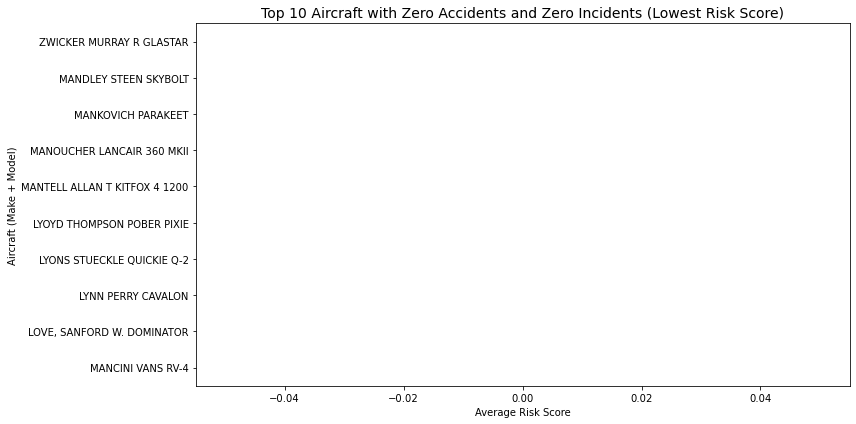

In [ ]:
# Step 1: Filter for aircraft with zero accidents and zero incidents
lowest_risk_models = (
    risk_summary[(risk_summary["Total_Accidents"] == 0) & (risk_summary["Total_Incidents"] == 1)]  # Filter for no accidents and no incidents
    .sort_values(by="Avg_RiskScore")  # Sort by Avg_RiskScore in ascending order
    .head(10)  # Select top 10 rows
)

# Step 2: Create a combined "Aircraft" column for Make and Model
lowest_risk_models["Aircraft"] = lowest_risk_models["Make"] + " " + lowest_risk_models["Model"]

# Step 3: Plot the top 10 lowest risk aircraft
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Avg_RiskScore",               # x-axis: average risk score
    y="Aircraft",                    # y-axis: combined Make + Model
    data=lowest_risk_models,         # Data source
    palette="viridis"
)

plt.title("Top 10 Aircraft with Zero Accidents and Zero Incidents (Lowest Risk Score)", fontsize=14)
plt.xlabel("Average Risk Score")
plt.ylabel("Aircraft (Make + Model)")
plt.tight_layout()
plt.show()

Identify Plane with single engine planes and 6 engines

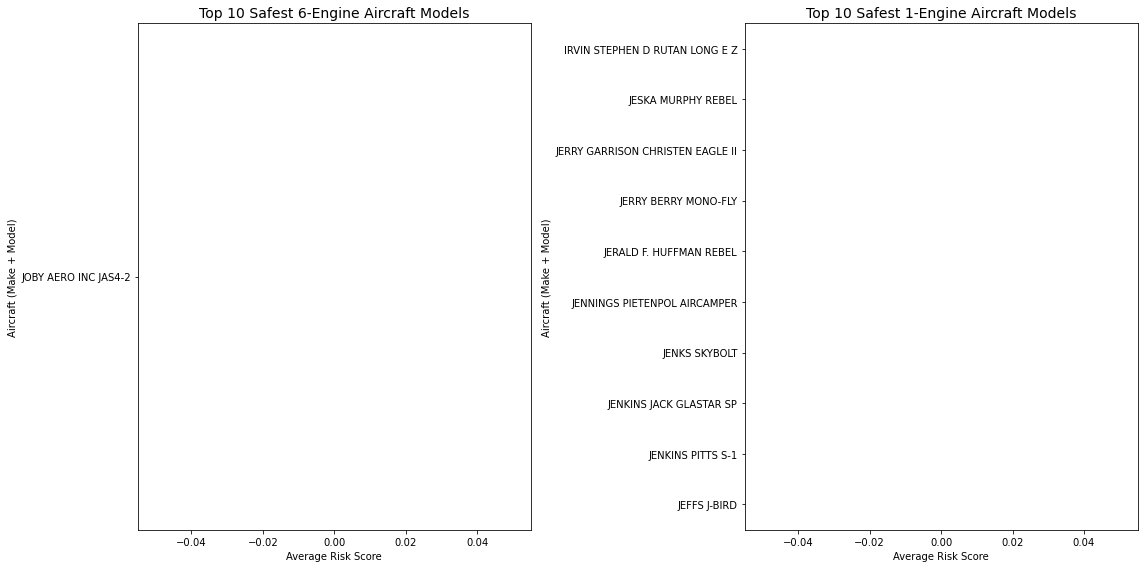

In [ ]:
# Step 1: Filter aircraft with 6 engines
six_engine_planes = df_clean[df_clean['Number.of.Engines'] == 6]
one_engine_planes = df_clean[df_clean['Number.of.Engines'] == 1]

# Step 2: Group by Make and Model, compute average RiskScore for 6-engine planes
risk_by_model_six = six_engine_planes.groupby(['Make', 'Model'])['RiskScore'].mean().reset_index()

# Step 3: Create Aircraft column (Make + Model) for 6-engine planes
risk_by_model_six['Aircraft'] = risk_by_model_six['Make'] + ' ' + risk_by_model_six['Model']

# Step 4: Sort by RiskScore and get top N safest for 6-engine planes
top_n = 10
safest_six_engine = risk_by_model_six.sort_values(by='RiskScore').head(top_n)

# Step 2 (Repeat): Group by Make and Model, compute average RiskScore for 1-engine planes
risk_by_model_one = one_engine_planes.groupby(['Make', 'Model'])['RiskScore'].mean().reset_index()

# Step 3 (Repeat): Create Aircraft column (Make + Model) for 1-engine planes
risk_by_model_one['Aircraft'] = risk_by_model_one['Make'] + ' ' + risk_by_model_one['Model']

# Step 4 (Repeat): Sort by RiskScore and get top N safest for 1-engine planes
safest_one_engine = risk_by_model_one.sort_values(by='RiskScore').head(top_n)

# Step 5: Create subplots for both 6-engine and 1-engine planes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Create two subplots (1 row, 2 columns)

# Plot for 6-engine aircraft
sns.barplot(
    x="RiskScore", 
    y="Aircraft", 
    data=safest_six_engine, 
    palette="Blues_r", 
    ax=axes[0]  # Plot on the first subplot
)
axes[0].set_title(f'Top {top_n} Safest 6-Engine Aircraft Models', fontsize=14)
axes[0].set_xlabel('Average Risk Score')
axes[0].set_ylabel('Aircraft (Make + Model)')

# Plot for 1-engine aircraft
sns.barplot(
    x="RiskScore", 
    y="Aircraft", 
    data=safest_one_engine, 
    palette="Blues_r", 
    ax=axes[1]  # Plot on the second subplot
)
axes[1].set_title(f'Top {top_n} Safest 1-Engine Aircraft Models', fontsize=14)
axes[1].set_xlabel('Average Risk Score')
axes[1].set_ylabel('Aircraft (Make + Model)')

# Adjust layout for tight fitting
plt.tight_layout()
plt.show()

## Reccomendation:

Aircraft with six engines had the lowest risk,followed by those with 1 engine.
Joby Aero INC JAS4-2 is the only plane with six engines.

Based on the above analysis, the below aircraft models are recommended for acquisition:
1. Joby Aero INC JAS4-2
2. Jeffs J- Bird
3. Jenkins Pitts s-1
4. Janks Skybolt
5. Jenning Pietenpol Aircamper

Reasons

These Aircrafts have had zero accidents

These aircraft have shown zero fatalities or  injuries in recorded incidents.

They have had just a single incident each

## Conclusion

To ensure a strong and secure entry into the aviation industry, we recommend prioritizing the acquisition and leasing of the above models. These aircraft have a demonstrated track record of operational safety, significantly reducing business risk while ensuring reliable performance